# Audio Processing

## Table of Contents
[1. Library Imports and Files](#Library-Imports-and-Files)  
[2. Knocking Audio Signal](#Knocking-Audio-Signal)  
[3. Speech Audio Signal](#Speech-Audio-Signal)

## Library Imports and Files

Library imports.

Scipy is used to open a wav file as a numpy array.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import numpy as np

import scipy.io.wavfile

In [2]:
KNOCKING = "../AudioFiles/knocking.wav"
SPEECH = "../AudioFiles/speech.wav"

A quick check on the data on the audio file to check that it seems in order.

The rate shouldbe 48,000 samples per second and the audio file should be about 6 seconds long. Having checked, everything seems to be in order.

## Knocking Audio Signal

Below, I have just plotted a real time graph of the audio signal of a knocking sound on wood.

In [3]:
rate, data = scipy.io.wavfile.read(KNOCKING)

print(rate)
print(len(data))
print(len(data)/rate)

48000
306000
6.375


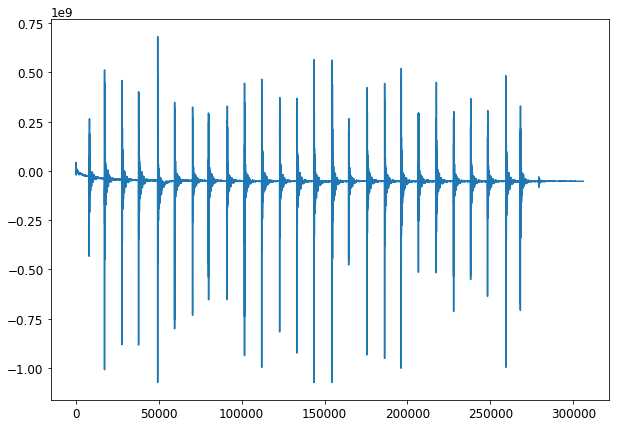

In [4]:
x = np.arange(0, len(data))
y = data

plt.figure(figsize=(10,7))
plt.plot(x, y)
plt.show()

And here, I apply a fft to the first 8192 samples of the audio file.

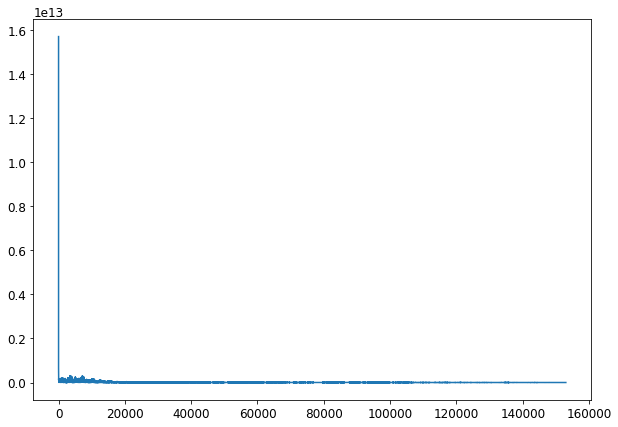

In [5]:
yFreq = np.fft.fft(data)

d = int(len(yFreq)/2)

plt.figure(figsize=(10,7))
plt.plot(abs(yFreq[:d]))
plt.show()

Start: 0	End: 8192


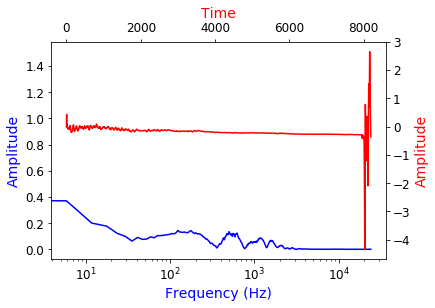

Start: 8192	End: 16384


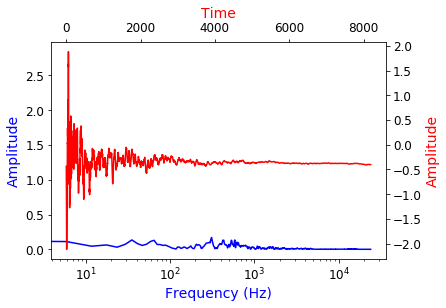

Start: 16384	End: 24576


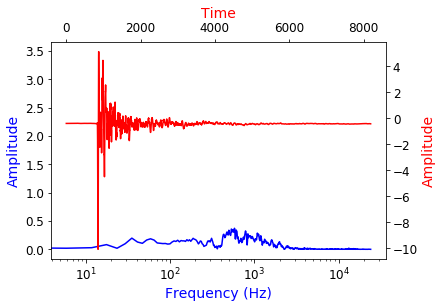

Start: 24576	End: 32768


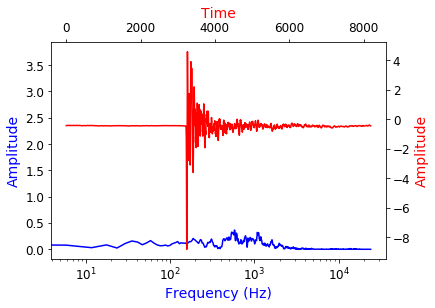

Start: 32768	End: 40960


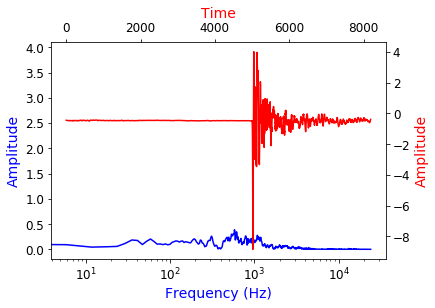

Start: 40960	End: 49152


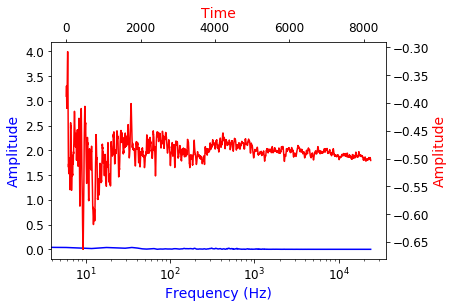

Start: 49152	End: 57344


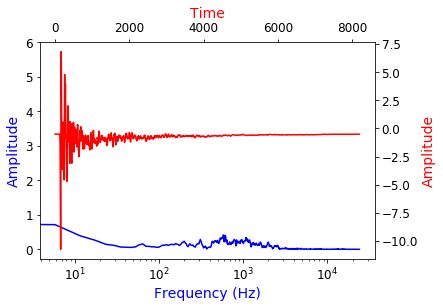

Start: 57344	End: 65536


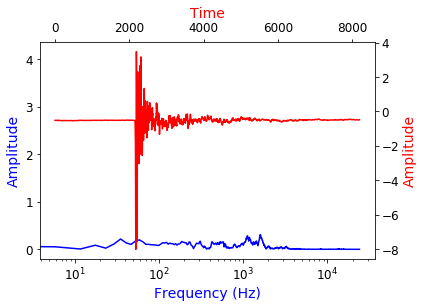

Start: 65536	End: 73728


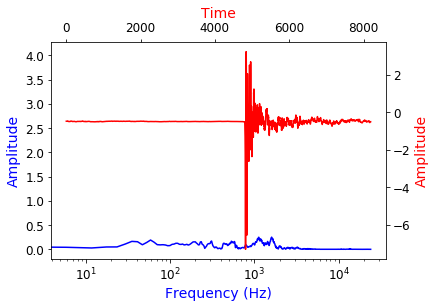

Start: 73728	End: 81920


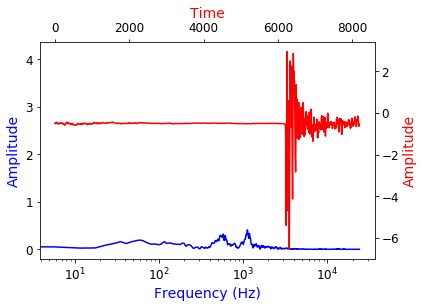

Start: 81920	End: 90112


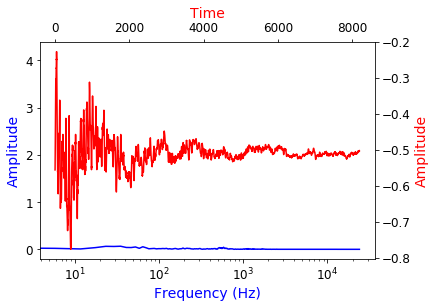

Start: 90112	End: 98304


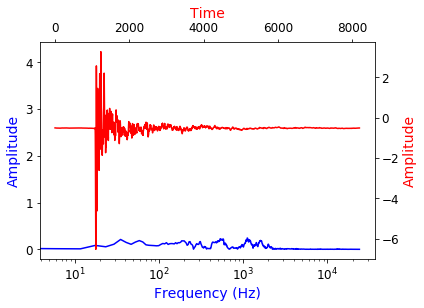

Start: 98304	End: 106496


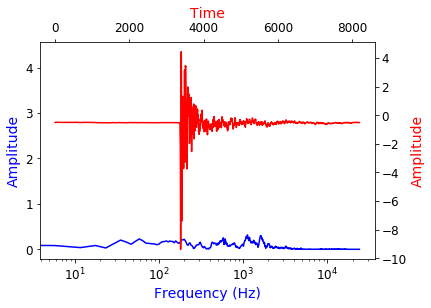

Start: 106496	End: 114688


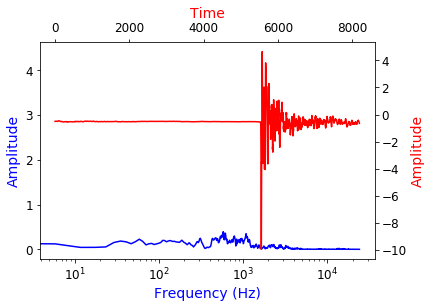

Start: 114688	End: 122880


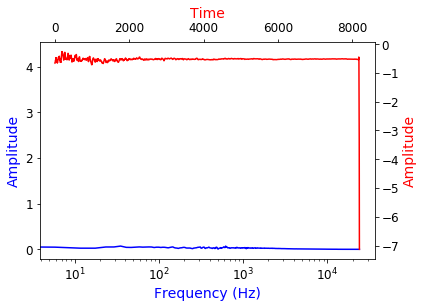

Start: 122880	End: 131072


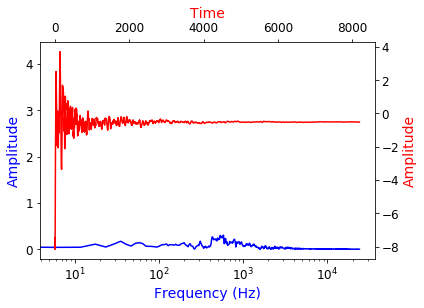

Start: 131072	End: 139264


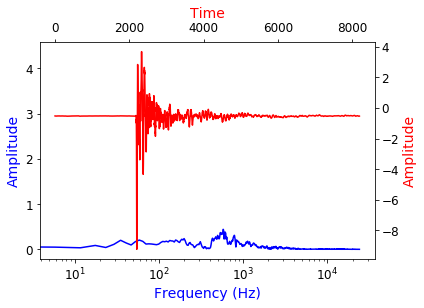

Start: 139264	End: 147456


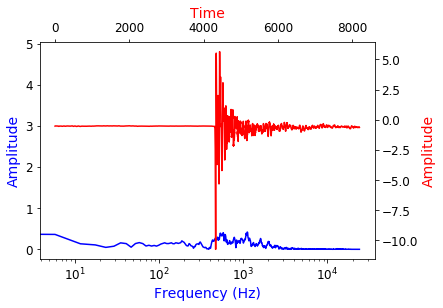

Start: 147456	End: 155648


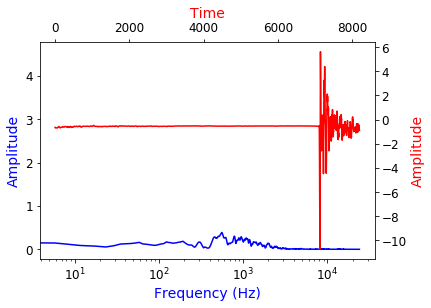

Start: 155648	End: 163840


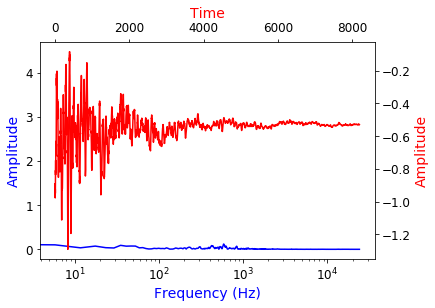

Start: 163840	End: 172032


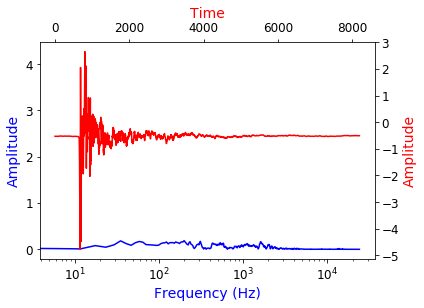

Start: 172032	End: 180224


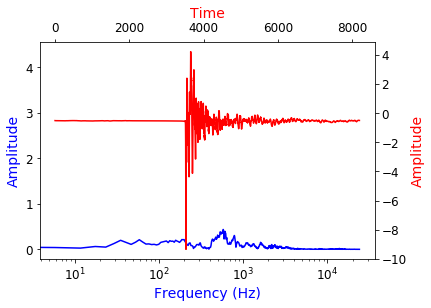

Start: 180224	End: 188416


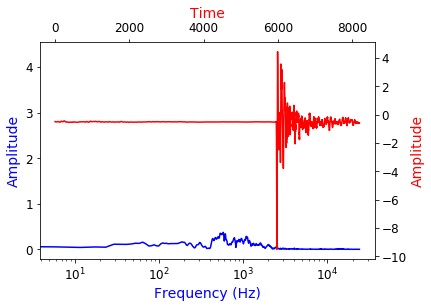

Start: 188416	End: 196608


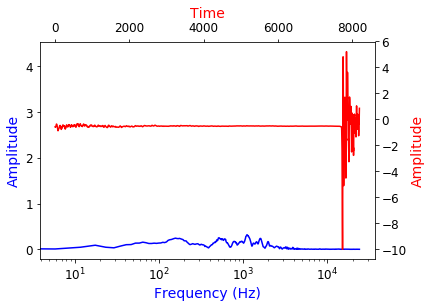

Start: 196608	End: 204800


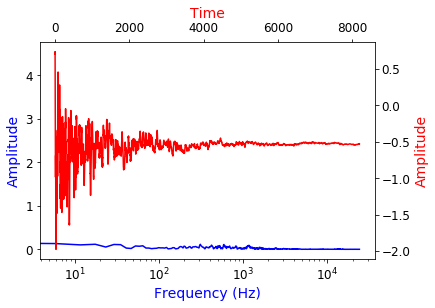

Start: 204800	End: 212992


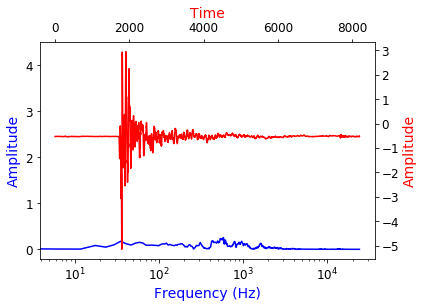

Start: 212992	End: 221184


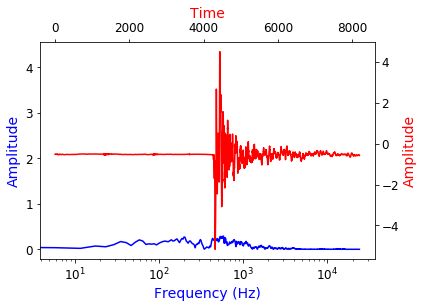

Start: 221184	End: 229376


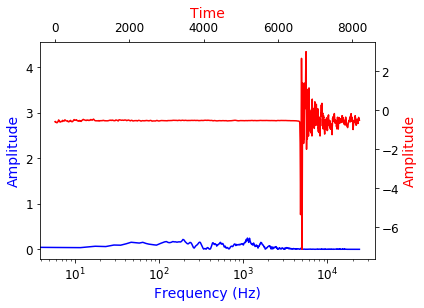

Start: 229376	End: 237568


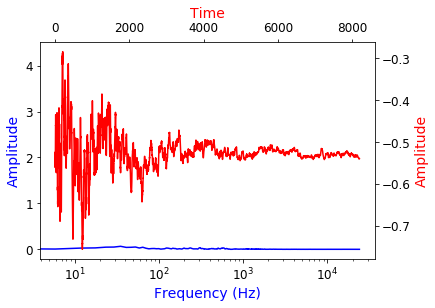

Start: 237568	End: 245760


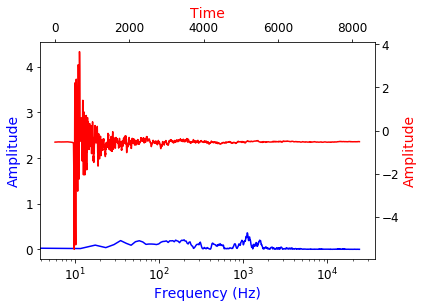

Start: 245760	End: 253952


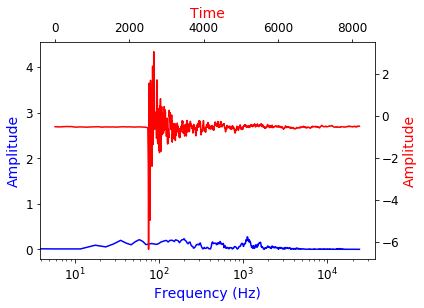

Start: 253952	End: 262144


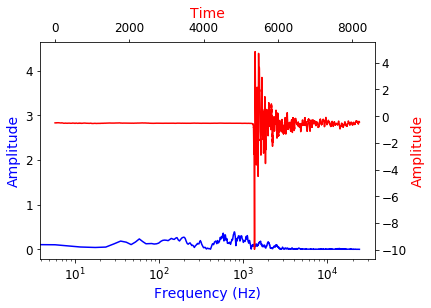

Start: 262144	End: 270336


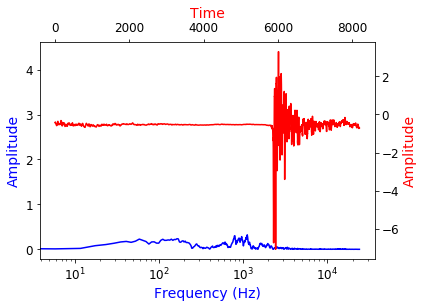

Start: 270336	End: 278528


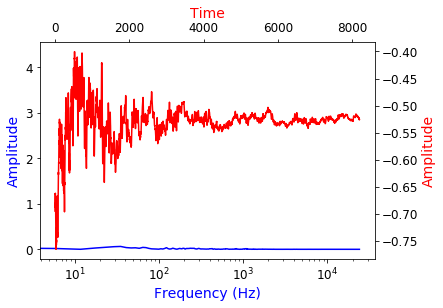

Start: 278528	End: 286720


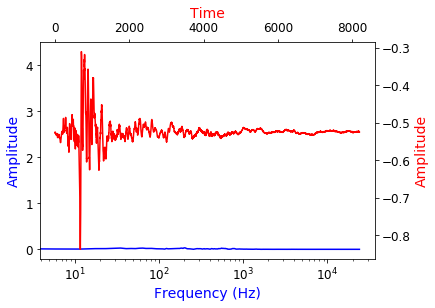

Start: 286720	End: 294912


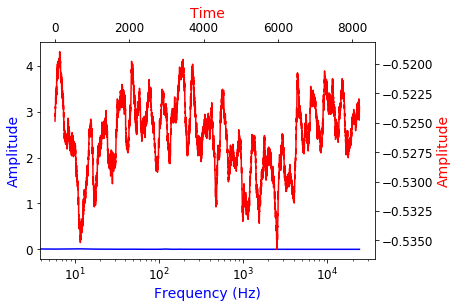

In [6]:
# Following 3 lines just do the math behind the Frequency bin sizes
fftX = np.arange(0, 8192 /2)
bin_reso = (rate / 2) / ( 8192 / 2)

fft_reso = fftX * bin_reso

# Time in the following graphs iwll just be an abstract sense of time
# The actual time in each data point is in the order pf e-05
# Didn't want to bother with that
time = np.arange(0, 8192)

bin_start = 0
bin_end = 8192

while bin_end + 8192 < len(data):
    print("Start: " + str(bin_start) + "\tEnd: " + str(bin_end))
    # Actual math being done
    yFreq = np.fft.fft(data[bin_start:bin_end])
    d = int(len(yFreq) / 2)
    
    # All of the following code is graphing
    fig = plt.figure()
    ax = fig.add_subplot(111, label = "FFT")
    ax2 = fig.add_subplot(111, label = "Audio", frame_on = False) # if frame_on is set to true, the first subplot does not show
    
    ax.plot(fft_reso[:d], abs(yFreq[:d]) / 1e11, color = 'b') # Dividing y values by 1e11 because it adds clutter to graph
    ax.set_xlabel('Frequency (Hz)', color = 'b')
    ax.set_ylabel('Amplitude', color = 'b')
    ax.set_xscale('log')
    
    ax2.plot(time, data[bin_start:bin_end] / 1e8, 'r') # Dividing y values to remove clutter again
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    ax2.set_xlabel('Time', color="r") 
    ax2.set_ylabel('Amplitude', color="r")
    ax2.xaxis.set_label_position('top') 
    ax2.yaxis.set_label_position('right')
    
    plt.show()
    
    # Increment the data I will be sampling
    bin_start += 8192
    bin_end += 8192

At this point I want to see what applying a window function to the input data does to the FFT. For this, I will the Hamming window function and numpy provides a function to create a Hamming function.

```python
x = np.hamming(M)
```
This will create a numpy array located at 'x' filled with M values.

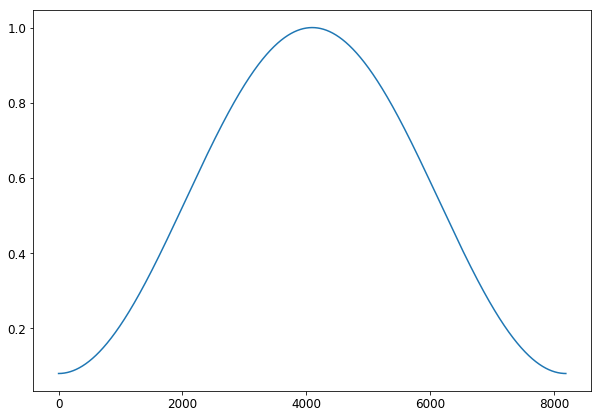

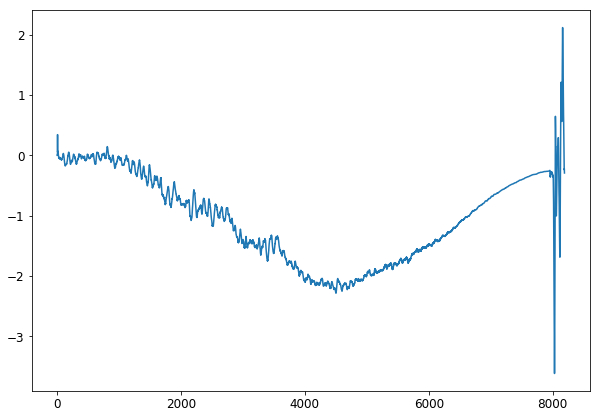

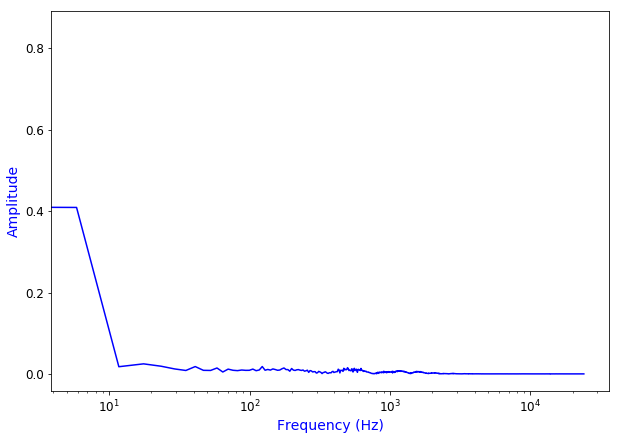

In [7]:
hamming = np.hamming(8192)

plt.figure(figsize = (10, 7))
plt.plot(hamming)
plt.show()

to_be_FFT = data[:8192]*hamming

plt.figure(figsize = (10, 7))
plt.plot(to_be_FFT / 1e7)
plt.show()

y = np.fft.fft(to_be_FFT)
d = int(len(y) / 2)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, label = "FFT")

ax.plot(fft_reso[:d], abs(y[:d]) / 1e11, color = 'b')
ax.set_xlabel('Frequency (Hz)', color = 'b')
ax.set_ylabel('Amplitude', color = 'b')
ax.set_xscale('log')
plt.show()

Unfortunately for the fft that I did above, the main frequencies are offcentred so instead I decided to look for one a place where the main signal components are centered. The place where I found the signal most centered was at start = 24576, end = 32768.

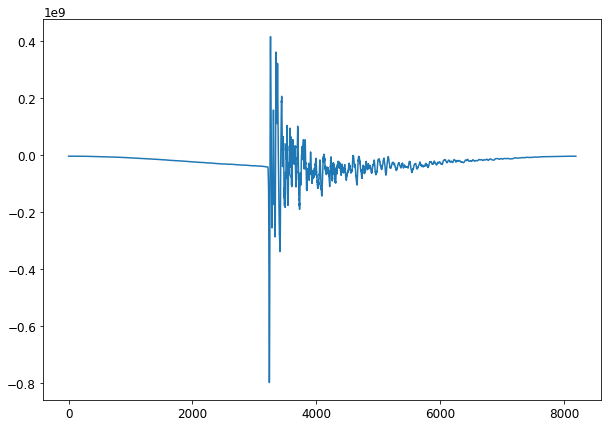

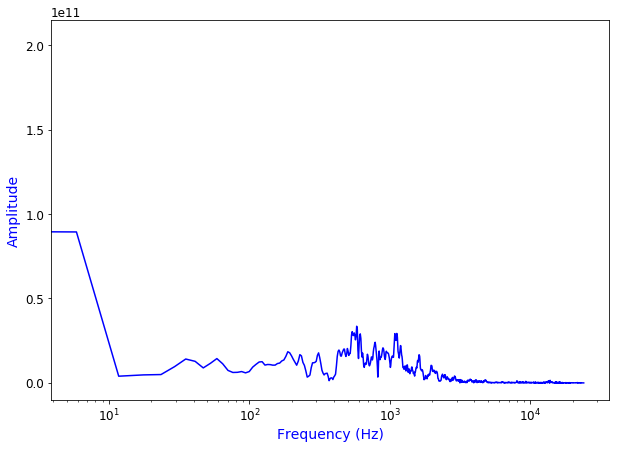

In [8]:
to_be_FFT = data[24576:32768] * hamming

plt.figure(figsize = (10, 7))
plt.plot(to_be_FFT)
plt.show()

y = np.fft.fft(to_be_FFT)
d = int(len(y) / 2)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, label = "FFT")
ax.plot(fft_reso[:d], abs(y[:d]), color = 'b')
ax.set_xlabel('Frequency (Hz)', color = 'b')
ax.set_ylabel('Amplitude', color = 'b')
ax.set_xscale('log')
plt.show()

#### Hanning Window

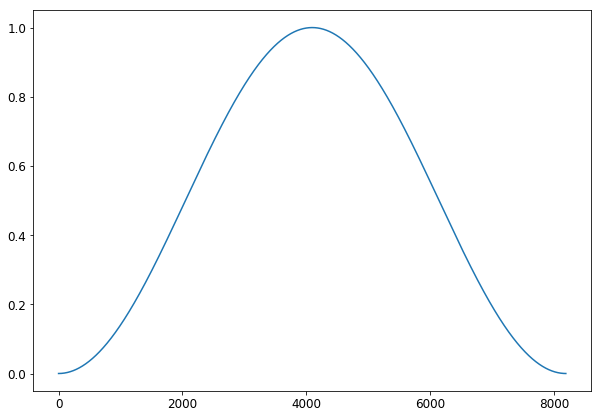

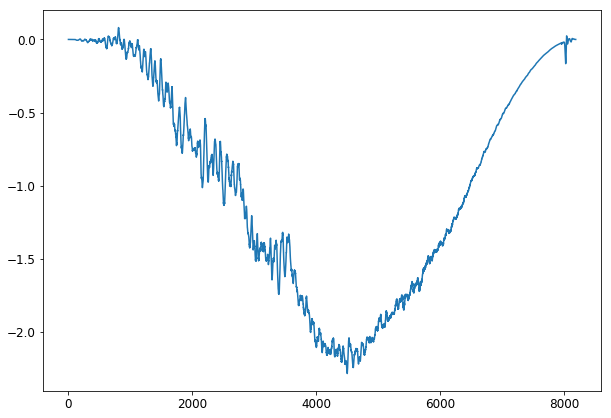

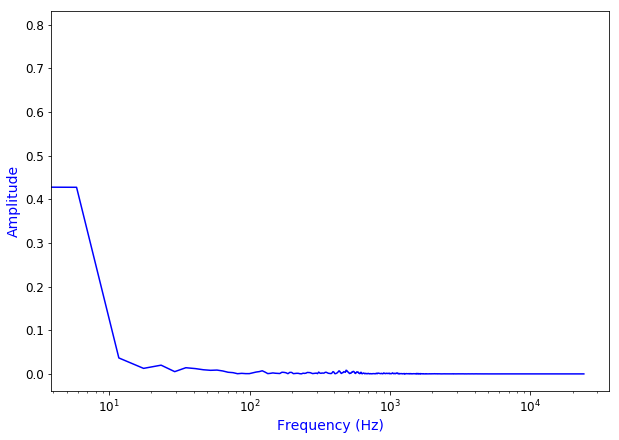

In [9]:
hanning = np.hanning(8192)

plt.figure(figsize = (10, 7))
plt.plot(hanning)
plt.show()

to_be_FFT = data[:8192]*hanning

plt.figure(figsize = (10, 7))
plt.plot(to_be_FFT / 1e7)
plt.show()

y = np.fft.fft(to_be_FFT)
d = int(len(y) / 2)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, label = "FFT")

ax.plot(fft_reso[:d], abs(y[:d]) / 1e11, color = 'b')
ax.set_xlabel('Frequency (Hz)', color = 'b')
ax.set_ylabel('Amplitude', color = 'b')
ax.set_xscale('log')
plt.show()

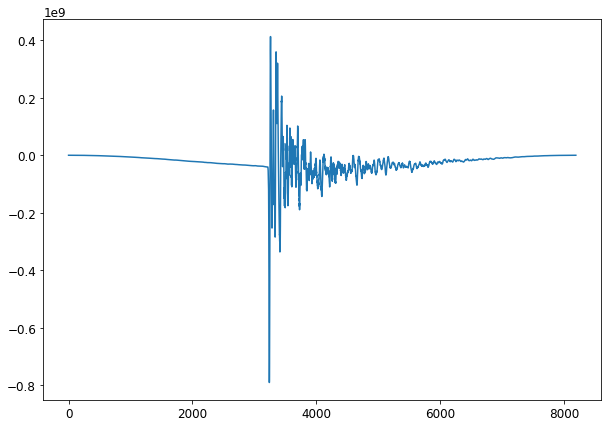

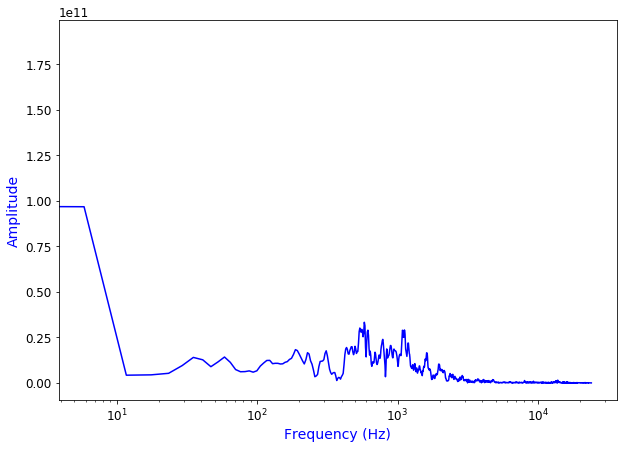

In [10]:
to_be_FFT = data[24576:32768] * hanning

plt.figure(figsize = (10, 7))
plt.plot(to_be_FFT)
plt.show()

y = np.fft.fft(to_be_FFT)
d = int(len(y) / 2)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, label = "FFT")
ax.plot(fft_reso[:d], abs(y[:d]), color = 'b')
ax.set_xlabel('Frequency (Hz)', color = 'b')
ax.set_ylabel('Amplitude', color = 'b')
ax.set_xscale('log')
plt.show()

## Speech Audio Signal

Here I am doing the very same thing I was doing above but on the audio file of my voice. I again check to make sure the sample rate and length of the audio file looks to be normal

In [11]:
rate, data = scipy.io.wavfile.read(SPEECH)

print(rate)
print(len(data))
print(len(data)/rate)

48000
366000
7.625


And then a quick graphing of real time data of voice.

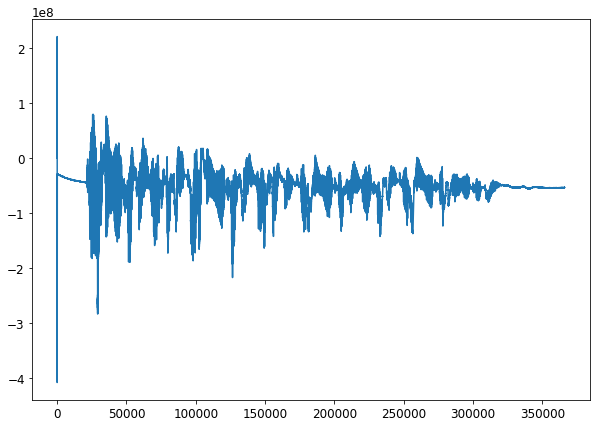

In [12]:
x = np.arange(0, len(data))
y = data

plt.figure(figsize=(10,7))
plt.plot(x, y)
plt.show()

Here, I can't quite just apply a fft to the voice file. There is something drowing out th erest of the audio data.

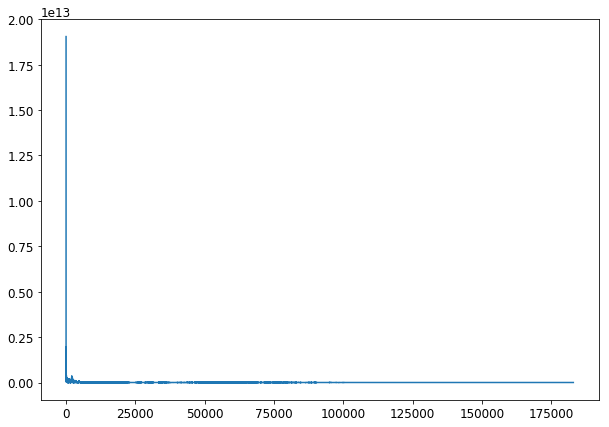

In [13]:
yFreq = np.fft.fft(data)

d = int(len(yFreq)/2)

plt.figure(figsize=(10,7))
plt.plot(abs(yFreq[:d - 1]))
plt.show()

Start: 0	End: 8192
[  1.39128073e+11   6.98334546e+10   1.10909645e+09 ...,   1.38675368e+05
   1.91870718e+05   1.81214906e+05]


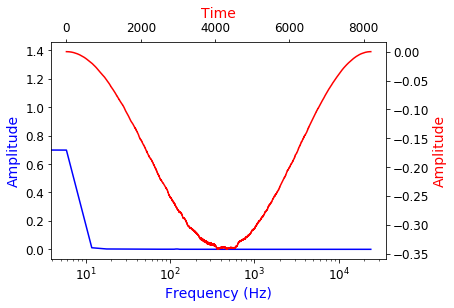

Start: 8192	End: 16384
[  1.66061089e+11   8.33132965e+10   7.24525481e+08 ...,   9.35907529e+04
   1.18075887e+04   1.54069732e+04]


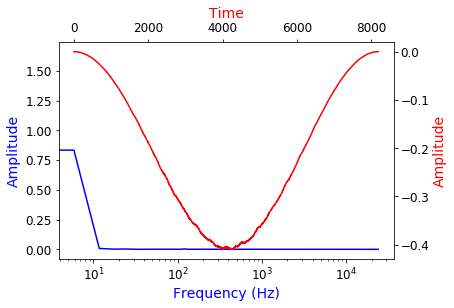

Start: 16384	End: 24576
[  1.82950895e+11   8.81951600e+10   3.74314795e+09 ...,   1.55075854e+05
   1.68763640e+05   8.06807093e+04]


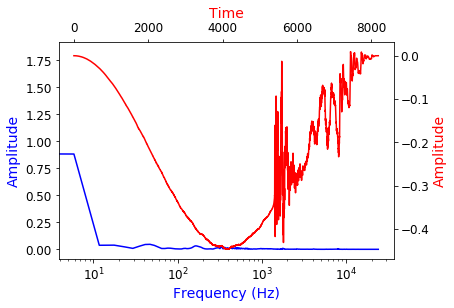

Start: 24576	End: 32768
[  3.41594837e+11   2.27780120e+11   1.03351694e+11 ...,   1.79105894e+05
   9.62245059e+04   1.36551112e+05]


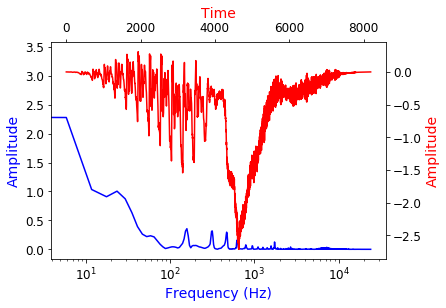

Start: 32768	End: 40960
[  8.87351972e+10   4.49388177e+10   9.71944862e+09 ...,   9.58771902e+04
   9.92285908e+04   3.46181156e+04]


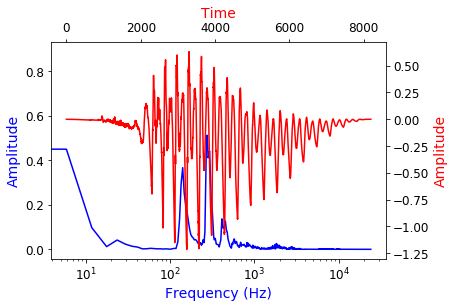

Start: 40960	End: 49152
[  2.05421875e+11   9.86039876e+10   3.92705457e+09 ...,   1.23562307e+05
   3.92528843e+04   1.15191875e+05]


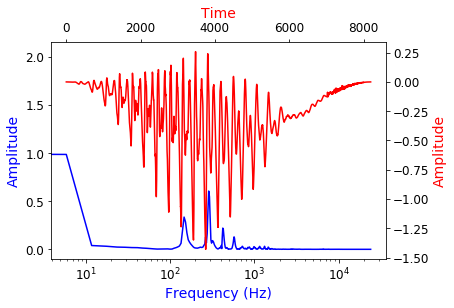

Start: 49152	End: 57344
[  2.56690561e+11   1.66933026e+11   7.27608030e+10 ...,   1.31002026e+05
   2.41349341e+05   2.96752172e+05]


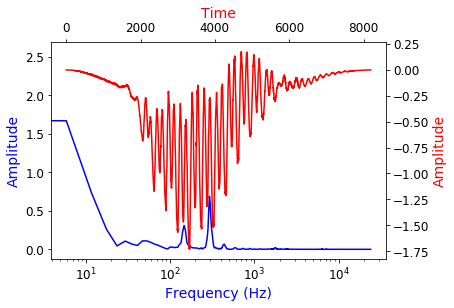

Start: 57344	End: 65536
[  1.58918634e+11   8.48080503e+10   3.41779379e+10 ...,   1.03824795e+05
   7.32941449e+04   6.04241123e+04]


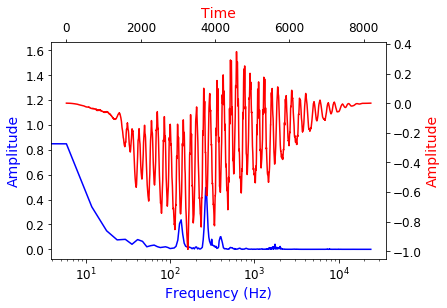

Start: 65536	End: 73728
[  2.52045897e+11   1.42340939e+11   3.28880687e+10 ...,   1.22252560e+05
   6.18750016e+04   8.49548801e+04]


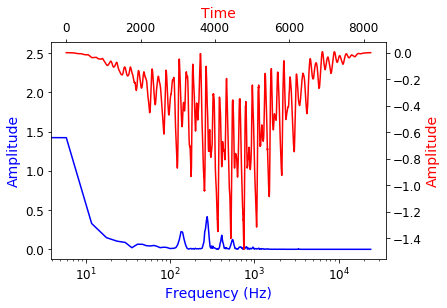

Start: 73728	End: 81920
[  2.19027717e+11   7.84963651e+10   4.12067661e+10 ...,   3.20358683e+04
   1.31692946e+05   1.52806035e+05]


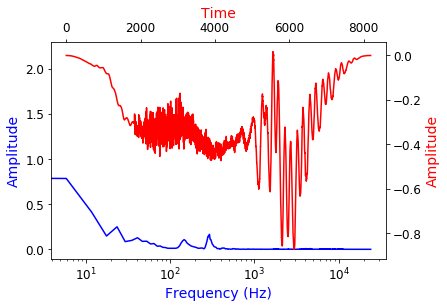

Start: 81920	End: 90112
[  2.33939339e+11   1.61999316e+11   8.00164659e+10 ...,   4.93875793e+04
   1.02081276e+04   6.11374262e+04]


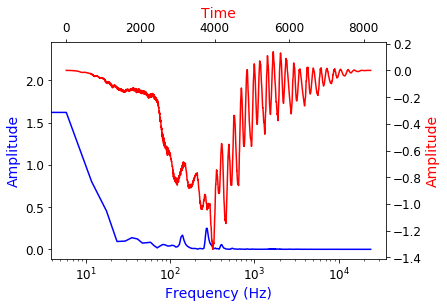

Start: 90112	End: 98304
[  1.91435268e+11   8.28790296e+10   2.15943363e+10 ...,   1.22777239e+05
   1.57561219e+05   8.48917519e+04]


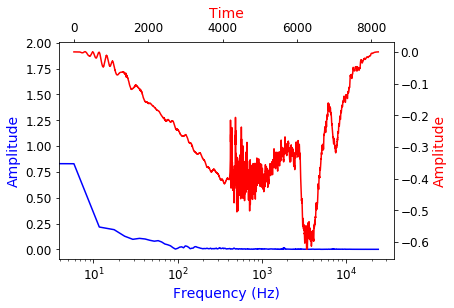

Start: 98304	End: 106496
[  2.28725382e+11   1.66584184e+11   9.15055185e+10 ...,   2.06768110e+05
   1.24239837e+05   1.19680928e+05]


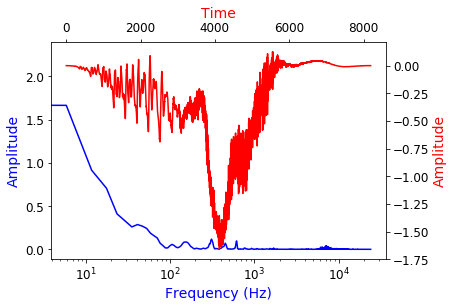

Start: 106496	End: 114688
[  1.34102906e+11   6.55606995e+10   8.51739817e+09 ...,   1.29317753e+05
   1.06675301e+05   3.06104053e+05]


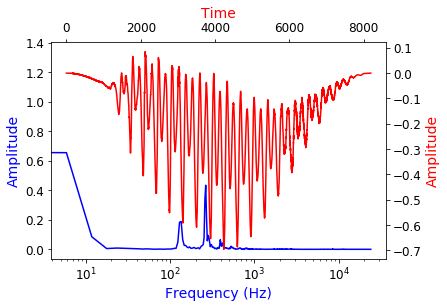

Start: 114688	End: 122880
[  2.37054361e+11   1.20704321e+11   4.03468181e+09 ...,   1.28208260e+05
   1.66866326e+05   1.16067315e+05]


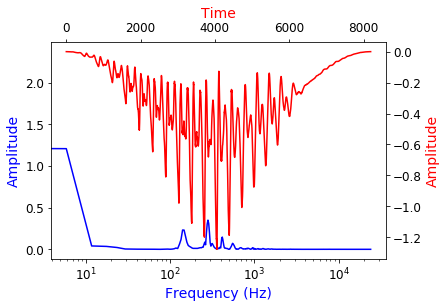

Start: 122880	End: 131072
[  3.60320697e+11   2.24757539e+11   6.86213452e+10 ...,   1.33707415e+05
   1.30638267e+05   9.22795432e+04]


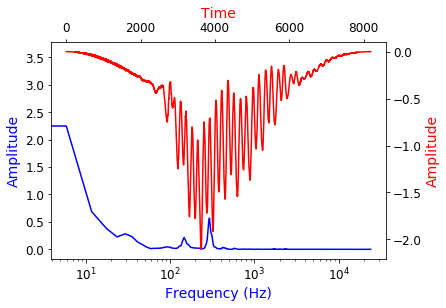

Start: 131072	End: 139264
[  2.47480143e+11   1.49644013e+11   4.17404416e+10 ...,   7.37850006e+04
   1.25536153e+05   1.50272067e+05]


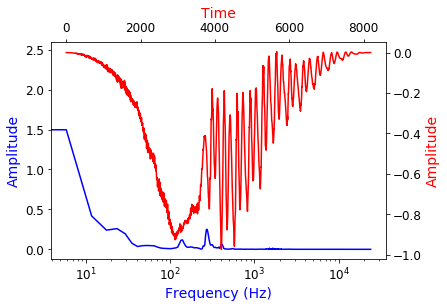

Start: 139264	End: 147456
[  1.83442257e+11   8.57801685e+10   1.42666988e+10 ...,   7.58852820e+04
   1.34310346e+05   1.68525670e+05]


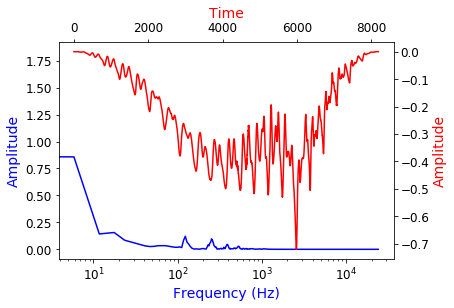

Start: 147456	End: 155648
[  2.64045611e+11   1.45039511e+11   2.66585555e+10 ...,   7.01237102e+04
   1.03452426e+05   2.32548241e+05]


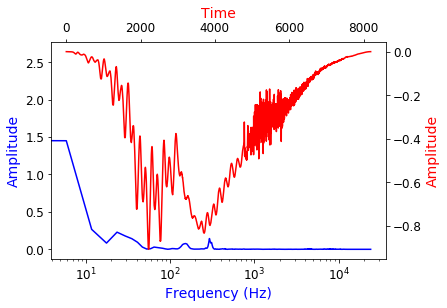

Start: 155648	End: 163840
[  1.51897907e+11   5.83996154e+10   2.80638048e+10 ...,   1.40178296e+05
   1.87732891e+05   1.76769415e+05]


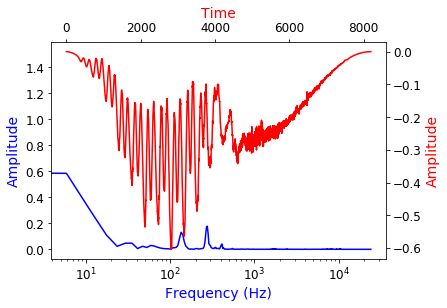

Start: 163840	End: 172032
[  1.93189063e+11   9.66674909e+10   9.54824906e+09 ...,   1.34875664e+05
   1.71320177e+05   8.51629753e+04]


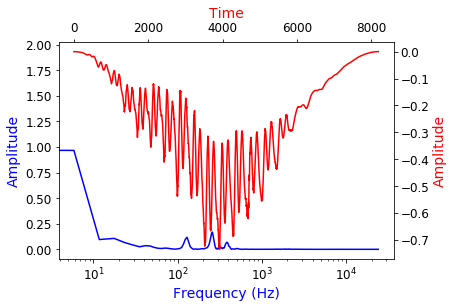

Start: 172032	End: 180224
[  2.19063223e+11   1.04144205e+11   8.29500959e+09 ...,   1.21937206e+05
   1.64058090e+05   2.73664560e+04]


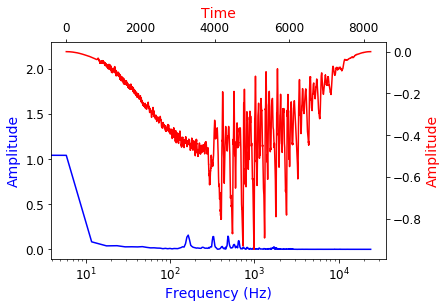

Start: 180224	End: 188416
[  2.26191897e+11   1.32320964e+11   4.01062982e+10 ...,   3.06653188e+04
   8.82289764e+04   1.29571772e+05]


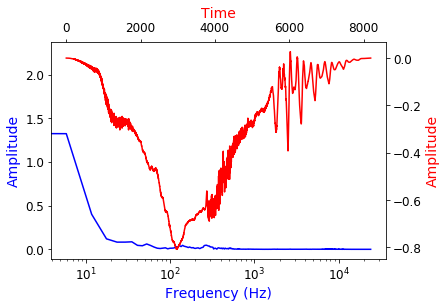

Start: 188416	End: 196608
[  2.05994370e+11   1.04606943e+11   6.41472326e+09 ...,   1.09873201e+05
   2.34952699e+05   2.39633192e+05]


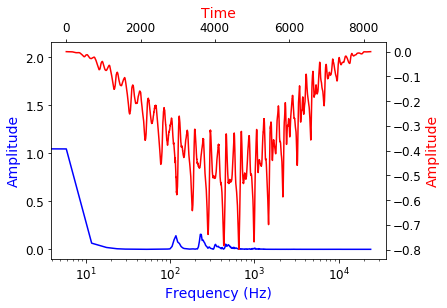

Start: 196608	End: 204800
[  2.17786458e+11   1.07012757e+11   2.31767400e+09 ...,   1.20677254e+05
   1.81790269e+05   1.49801130e+05]


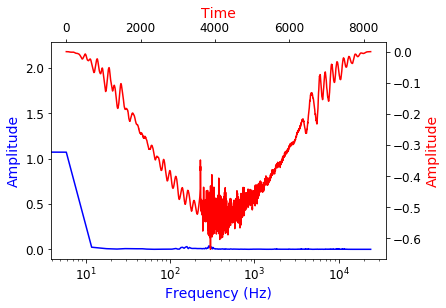

Start: 204800	End: 212992
[  2.37508636e+11   1.08750443e+11   7.90394094e+09 ...,   1.67068769e+05
   1.31436853e+05   8.50786851e+04]


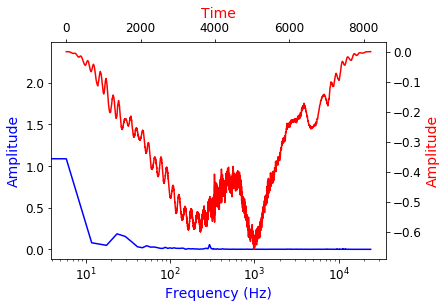

Start: 212992	End: 221184
[  1.75564316e+11   9.05680245e+10   3.40883633e+09 ...,   1.33675584e+05
   9.23693431e+04   1.22451023e+05]


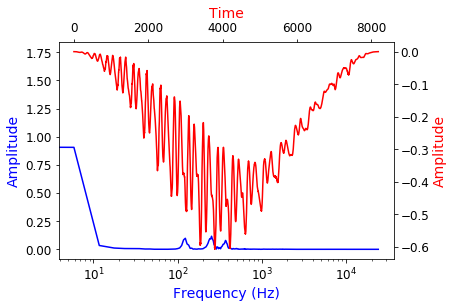

Start: 221184	End: 229376
[  2.11722395e+11   1.00306916e+11   1.63393591e+10 ...,   1.70044650e+05
   1.00595092e+05   9.71247848e+04]


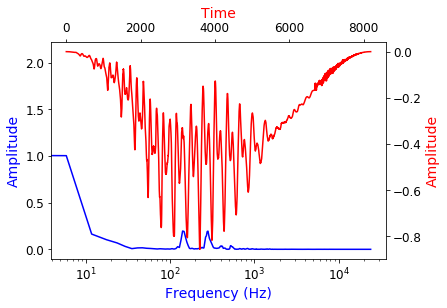

Start: 229376	End: 237568
[  3.28319938e+11   2.03769341e+11   5.41034574e+10 ...,   7.82857384e+04
   2.40103118e+04   8.03479197e+04]


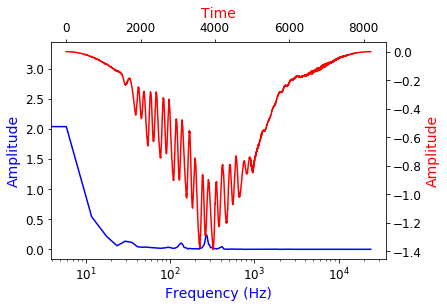

Start: 237568	End: 245760
[  1.63179436e+11   7.01200216e+10   1.51444752e+10 ...,   2.86684271e+04
   1.26607210e+05   1.47428122e+05]


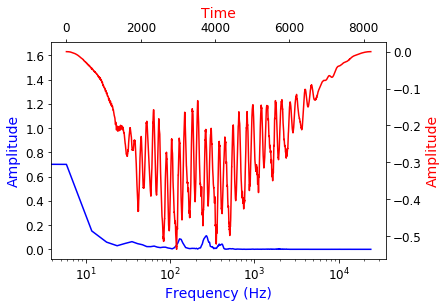

Start: 245760	End: 253952
[  2.04629861e+11   9.84983900e+10   4.28873235e+09 ...,   6.93157023e+04
   1.37470684e+05   7.78909067e+04]


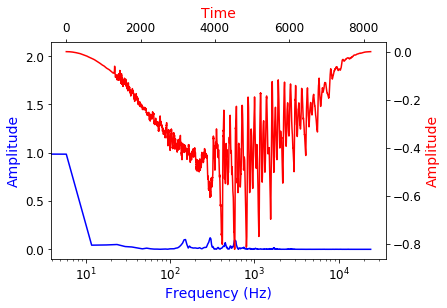

Start: 253952	End: 262144
[  2.40994608e+11   1.50762169e+11   6.49591375e+10 ...,   9.01717735e+04
   2.60705768e+04   7.01645187e+04]


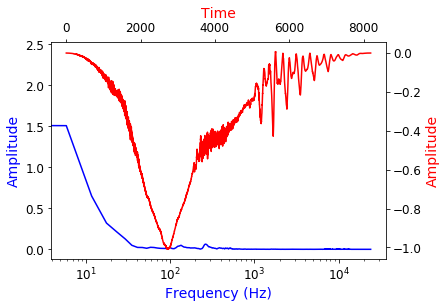

Start: 262144	End: 270336
[  1.89229689e+11   9.74758362e+10   3.72640563e+09 ...,   1.81817842e+05
   2.51475962e+05   2.05065658e+05]


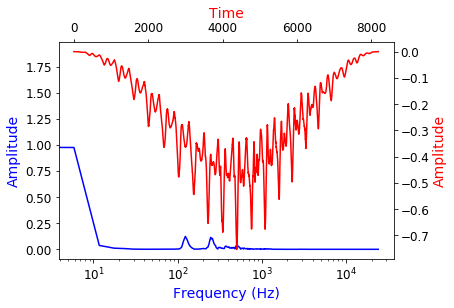

Start: 270336	End: 278528
[  2.13035686e+11   1.05683885e+11   2.07324314e+09 ...,   8.29043758e+04
   1.89417540e+05   2.13332856e+05]


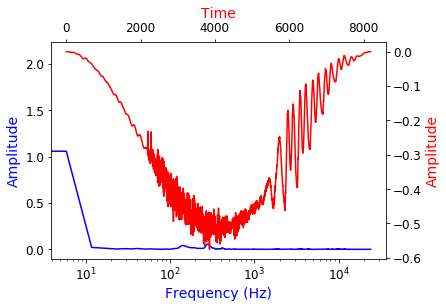

Start: 278528	End: 286720
[  2.44909418e+11   1.33769332e+11   3.25396623e+10 ...,   6.75007158e+04
   1.84085818e+05   8.32461622e+04]


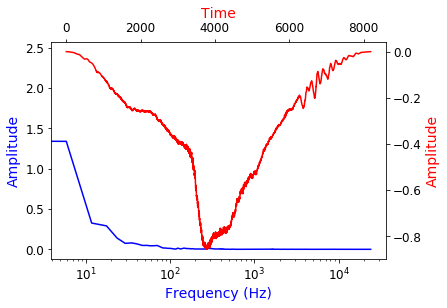

Start: 286720	End: 294912
[  1.98731829e+11   1.00465742e+11   3.63010463e+09 ...,   6.04915261e+04
   1.92244687e+04   2.67652364e+04]


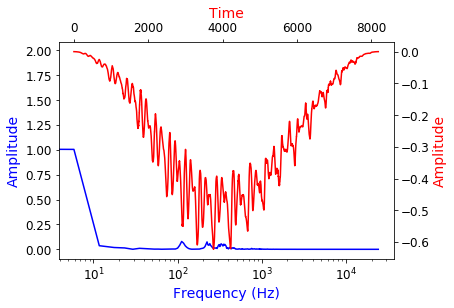

Start: 294912	End: 303104
[  2.18457041e+11   1.11707038e+11   2.45751041e+09 ...,   2.09622892e+05
   1.74215001e+05   1.35792983e+05]


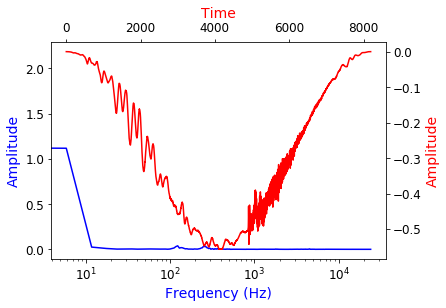

Start: 303104	End: 311296
[  2.30578855e+11   1.07713126e+11   7.16609577e+09 ...,   9.58022316e+04
   1.09576358e+05   9.38408756e+04]


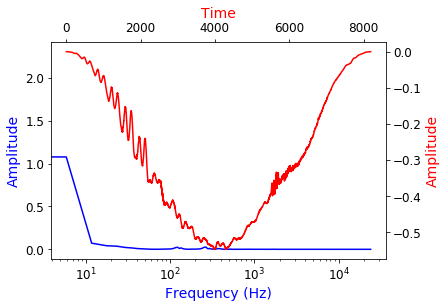

Start: 311296	End: 319488
[  2.10185628e+11   1.02983022e+11   1.10861172e+09 ...,   9.11821699e+04
   9.29724347e+04   1.08049997e+05]


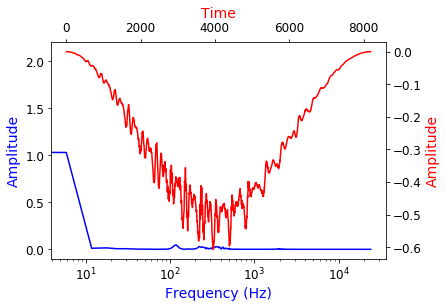

Start: 319488	End: 327680
[  2.04706129e+11   1.02386561e+11   6.86483953e+08 ...,   3.82008850e+04
   1.43412523e+05   1.64401752e+05]


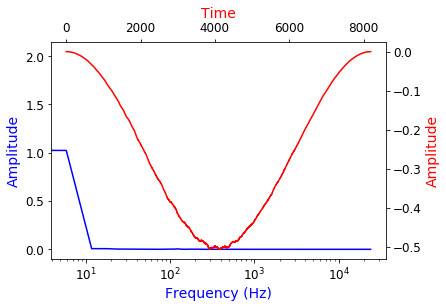

Start: 327680	End: 335872
[  2.20054457e+11   1.10148168e+11   3.48425411e+08 ...,   7.09196882e+04
   1.29702832e+05   1.74905682e+05]


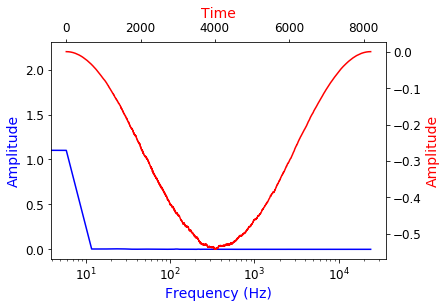

Start: 335872	End: 344064
[  2.24569801e+11   1.14031238e+11   1.78039751e+09 ...,   1.29796054e+05
   8.47371262e+04   2.70211503e+04]


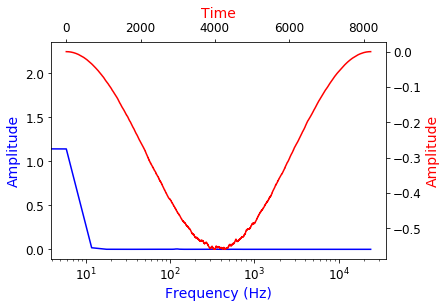

Start: 344064	End: 352256
[  2.19154055e+11   1.09715831e+11   1.91818365e+08 ...,   8.21602149e+04
   1.26792901e+05   8.83821914e+04]


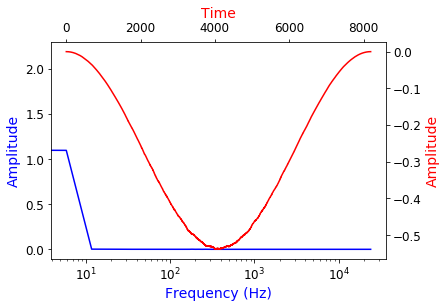

In [16]:
# Following 3 lines just do the math behind the Frequency bin sizes
fftX = np.arange(0, 8192 /2)
bin_reso = (rate / 2) / ( 8192 / 2)

fft_reso = fftX * bin_reso

# Time in the following graphs iwll just be an abstract sense of time
# The actual time in each data point is in the order pf e-05
# Didn't want to bother with that
time = np.arange(0, 8192)

bin_start = 0
bin_end = 8192

while bin_end + 8192 < len(data):
    print("Start: " + str(bin_start) + "\tEnd: " + str(bin_end))
    # Actual math being done
    val_to_FFT = data[bin_start:bin_end] * hanning
    yFreq = np.fft.fft(val_to_FFT)
    d = int(len(yFreq) / 2)
    
    # All of the following code is graphing
    fig = plt.figure()
    ax = fig.add_subplot(111, label = "FFT")
    ax2 = fig.add_subplot(111, label = "Audio", frame_on = False) # if frame_on is set to true, the first subplot does not show
    
    mag = abs(yFreq[:d])
    
    ax.plot(fft_reso[:d], mag / 1e11, color = 'b') # Dividing y values by 1e11 because it adds clutter to graph
    ax.set_xlabel('Frequency (Hz)', color = 'b')
    ax.set_ylabel('Amplitude', color = 'b')
    ax.set_xscale('log')
    
    ax2.plot(time, val_to_FFT / 1e8, 'r') # Dividing y values to remove clutter again
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    ax2.set_xlabel('Time', color="r") 
    ax2.set_ylabel('Amplitude', color="r")
    ax2.xaxis.set_label_position('top') 
    ax2.yaxis.set_label_position('right')
    
    plt.show()
    
    # Increment the data I will be sampling
    bin_start += 8192
    bin_end += 8192